In [9]:
import numpy as np
import matplotlib.pyplot as plt

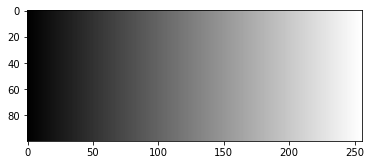

In [13]:
im = np.arange(256)
im = im[np.newaxis,:]
im = np.repeat(im,100,axis=0)
plt.imshow(im,cmap='gray')

# Processing Grayscale images

In [48]:
im = plt.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg')

In [21]:
type(im)

numpy.ndarray

In [22]:
im.shape


(333, 250)

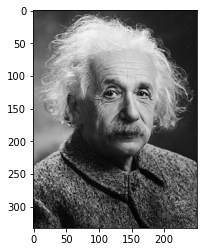

In [23]:
plt.imshow(im,cmap='gray')

In [24]:
im

array([[ 61,  61,  60, ...,  23,  24,  24],
       [ 63,  62,  62, ...,  23,  24,  24],
       [ 65,  64,  63, ...,  23,  24,  24],
       ...,
       [ 25,  10,  23, ..., 143,  65,  69],
       [ 24,  25,  48, ...,  74,  67,  59],
       [  9,  16,  40, ...,  84,  73,  59]], dtype=uint8)

In [28]:
# pip install opencv-contrib-python

# Grayscale Images in OpenCv

In [1]:
import cv2

In [49]:
img2 = cv2.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg',cv2.IMREAD_GRAYSCALE)

In [50]:
type(img2)


numpy.ndarray

In [7]:
img.dtype

dtype('uint8')

In [9]:
img2[23,100] = 200

In [51]:
cv2.imshow('Gray',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
cv2.imwrite(r'C:\Users\Admin\Downloads\Albert_Einstein_Head2.jpg',img2)

True

# RGB Images

# Bilinear

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# img = plt.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg')
img = cv2.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg',cv2.IMREAD_GRAYSCALE)

In [31]:
S = np.array([[2,0],[0,2]])

numRows = img.shape[0]
numCols = img.shape[1]

In [26]:
Tinv = np.linalg.inv(S)

In [27]:
Tinv

array([[0.5, 0. ],
       [0. , 0.5]])

In [28]:
def f_bilinearInterpolate(r,c,I):
    lc = int(c)
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr+1
    wt = br-r
    wb = r-tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc]
        b = wl*I[br,lc] + wr*I[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

In [56]:
S = np.array([[2,0],[0,2]])
I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        #P = np.int16(np.round(P))
        i , j = P[0] , P[1]
        if i < 0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = f_bilinearInterpolate(i,j,img)
            I2[new_i,new_j] = g

In [57]:
def displayImageInActualSize(I):
    dpi = plt.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi) , H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

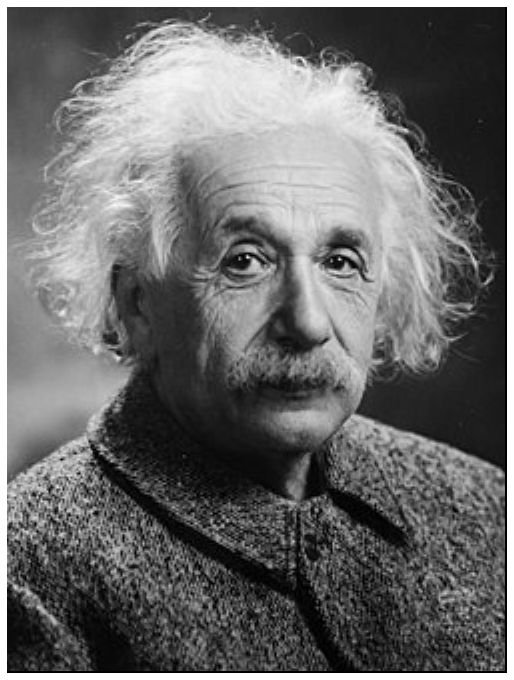

In [60]:
displayImageInActualSize(I2)

# ROTATION


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# img = plt.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg')
I_gray = cv2.imread(r'C:\Users\Admin\Downloads\Albert_Einstein_Head.jpg',cv2.IMREAD_GRAYSCALE)

In [95]:
a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa],[sa,ca]])
rMax,cMax = I_gray.shape[0],I_gray.shape[1]
Cords = np.array([[0,0],[0,cMax-1],[rMax-1,0],[rMax-1,cMax-1]])
A_dash = R.dot(Cords.T)
mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))
H,W = maxR-minR+1, maxC-minC+1
I2 = np.zeros((H,W),dtype='uint8')

In [97]:
Tinv = np.linalg.inv(R)
for new_i in range(minR,maxR):
    for new_j in range(minC,maxC):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        i , j = P[0] , P[1]
        if i < 0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = f_bilinearInterpolate(i,j,I_gray)
            I2[new_i-minR,new_j-minC] = g

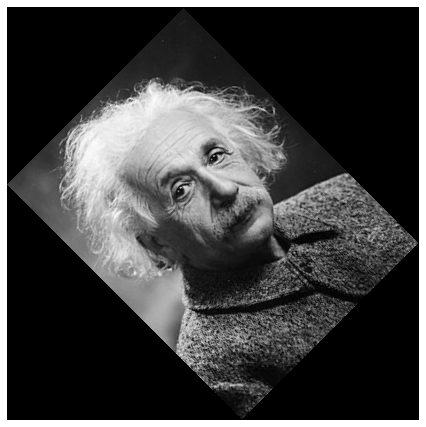

In [98]:
displayImageInActualSize(I2)

In [102]:
# make function for the code above

def f_getExtents(T,rMax,cMax):
    Cords = np.array([[0,0],[0,cMax-1],[rMax-1,0],[rMax-1,cMax-1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [103]:
def f_transform(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtents(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j])
            P = Tinv.dot(P_dash)
            i , j = P[0] , P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [105]:
I2 = f_transform(R,I_gray)

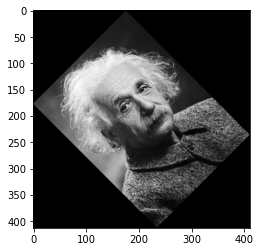

In [106]:
plt.imshow(I2,cmap='gray')

# Reflection

In [107]:
T = np.array([[-1,0],[0,1]])

In [108]:
I2 = f_transform(T,I_gray)

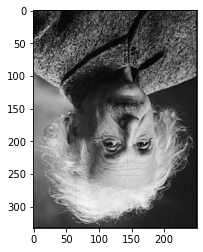

In [110]:
plt.imshow(I2,cmap='gray')

In [111]:
I2 = f_transform(T,I_gray)

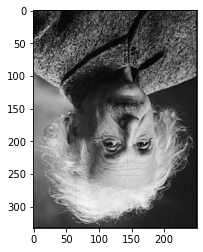

In [112]:
plt.imshow(I2,cmap='gray')

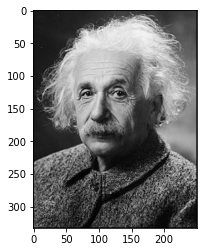

In [113]:
T = np.array([[1,0],[0,-1]])
I2 = f_transform(T,I_gray)
plt.imshow(I2,cmap='gray')

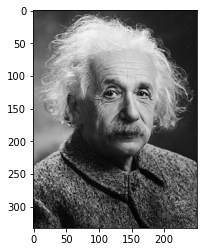

In [114]:
plt.imshow(I_gray,cmap='gray')

# Shear

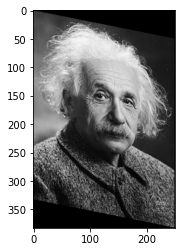

In [115]:
k = 0.2
T = np.array([[1,k],[0,1]])
I2 = f_transform(T,I_gray)
plt.imshow(I2,cmap='gray')

In [116]:
def f_getExtentsAffine(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [117]:
def f_transformAffine(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsAffine(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j,1])
            P = Tinv.dot(P_dash)
            i , j = P[0] , P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2